In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install imutils

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
dataset = "/content/drive/MyDrive/Facemask_Detection"

In [6]:
imagePaths=list(paths.list_images(dataset))

In [8]:
imagePaths

['/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_277.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_2952.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_2535.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_3141.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_3009.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_3584.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_433.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_3230.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_356.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_3807.jpg',
 '/content/drive/MyDrive/Facemask_Detection/dataset/without_mask/without_mask_2904.jpg',
 '/content/drive/MyDrive

In [9]:
data=[]
labels=[]

for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image = load_img(i,target_size=(96,96))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [10]:
data = np.array(data,dtype='float32')
labels = np.array(labels)

In [11]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [12]:
lb=LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [13]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
## Splitting of Data

train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=0.20,random_state=10,stratify=labels)

In [15]:
train_X

array([[[[-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         ...,
         [ 0.21568632, -0.41176468, -0.8117647 ],
         [ 0.22352946, -0.40392154, -0.8039216 ],
         [ 0.22352946, -0.40392154, -0.8039216 ]],

        [[-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         ...,
         [ 0.20000005, -0.40392154, -0.8117647 ],
         [ 0.20784318, -0.3960784 , -0.8039216 ],
         [ 0.20784318, -0.3960784 , -0.8039216 ]],

        [[-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         ...,
         [ 0.20000005, -0.40392154, -0.8117647 ],
         [ 0.20784318, -0.3960784 , -0.8039216 ],
         [ 0.20784318, -0.3960784 , -0.8039216 ]],

        ...,

        [[ 0.78039217,  0.28627455, -0

In [16]:
train_Y.size

6400

In [17]:
test_Y.size

1600

In [18]:
aug=ImageDataGenerator(
                       rotation_range=20,
                       zoom_range=0.15,width_shift_range=0.2,
                       height_shift_range=0.2,shear_range=0.15,
                       horizontal_flip=True,
                       vertical_flip=True,
                       fill_mode='nearest'
                       )

In [19]:
input_shape = (96,96,3)

In [20]:
# Build Model
input_image = Input(shape=input_shape)
# 1st Conv layer
model = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape)(input_image)
model = MaxPooling2D((2, 2),padding='same')(model)
# 2nd Conv layer
model = Conv2D(32, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 3rd Conv layer
model = Conv2D(64, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 4th Conv layer
model = Conv2D(128, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# 5th Conv layer
model = Conv2D(256, (3, 3), activation='relu', padding='same')(model)
model = MaxPooling2D((2, 2),padding='same')(model)
# FC layers
model = Flatten()(model)
#model = Dense(1024, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(model)
model = Dense(1024)(model)
#model = Dropout(0.2)(model)

#model = Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(model)
model = Dense(64)(model)
#model = Dropout(0.2)(model)

output= Dense(2, activation='softmax')(model)

model = Model(inputs=[input_image], outputs=[output])

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496 

In [22]:
lr=0.0005
Epochs=20 #100
BS=32

opt=Adam(learning_rate=lr,weight_decay=lr/Epochs)

In [23]:
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [24]:
history=model.fit(
aug.flow(train_X,train_Y,batch_size=BS),
steps_per_epoch=len(train_X)//BS,
validation_data=(test_X,test_Y),
validation_steps=len(test_X)//BS,
epochs=Epochs

)


Epoch 1/20
100/100 [==============================] - 60s 569ms/step - loss: 0.5488 - accuracy: 0.7344 - val_loss: 0.3569 - val_accuracy: 0.8562
Epoch 2/20
100/100 [==============================] - 57s 570ms/step - loss: 0.3647 - accuracy: 0.8534 - val_loss: 0.3387 - val_accuracy: 0.8662
Epoch 3/20
100/100 [==============================] - 54s 535ms/step - loss: 0.3160 - accuracy: 0.8600 - val_loss: 0.2384 - val_accuracy: 0.9000
Epoch 4/20
100/100 [==============================] - 56s 557ms/step - loss: 0.2759 - accuracy: 0.8916 - val_loss: 0.3271 - val_accuracy: 0.8863
Epoch 5/20
100/100 [==============================] - 55s 552ms/step - loss: 0.2603 - accuracy: 0.8975 - val_loss: 0.2121 - val_accuracy: 0.9162
Epoch 6/20
100/100 [==============================] - 54s 534ms/step - loss: 0.2503 - accuracy: 0.8978 - val_loss: 0.1799 - val_accuracy: 0.9262
Epoch 7/20
100/100 [==============================] - 55s 553ms/step - loss: 0.2164 - accuracy: 0.9194 - val_loss: 0.1859 - val_ac

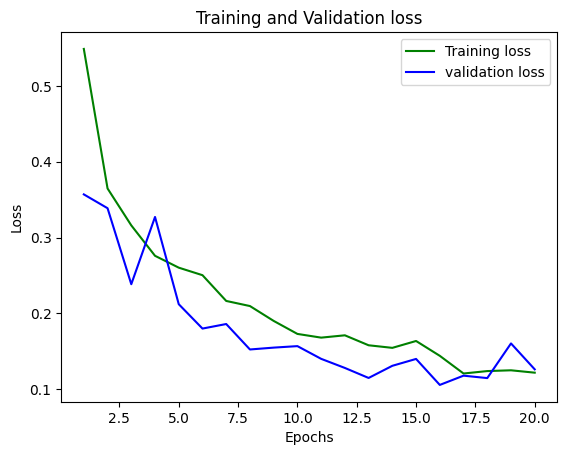

In [25]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

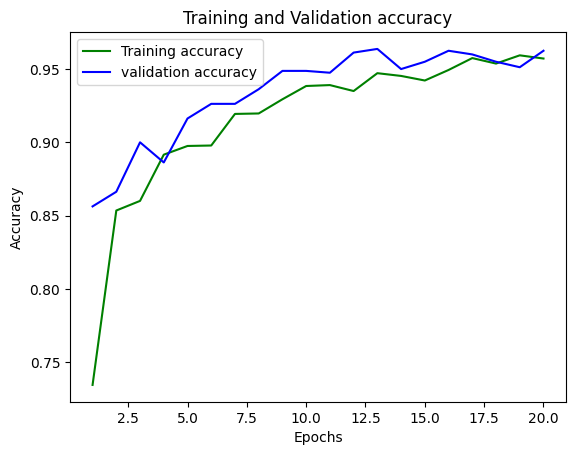

In [26]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

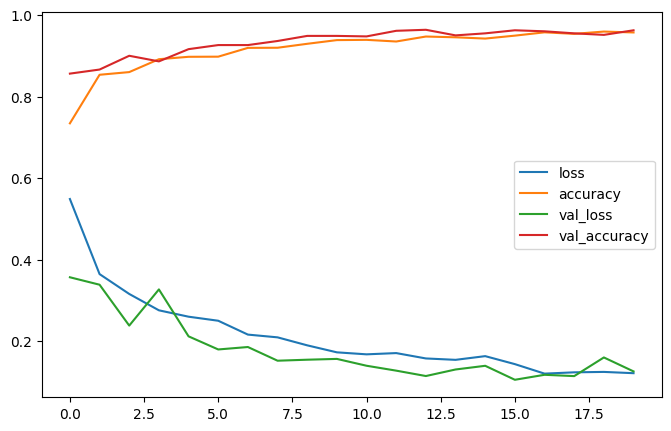

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [28]:
model.save('/content/drive/MyDrive/Colab Notebooks/garvita.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

25/25 [==============================] - 7s 282ms/step
              precision    recall  f1-score   support

   with_mask       0.95      0.98      0.96       400
without_mask       0.98      0.94      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800

